In [178]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import json
import pandas as pd
import random
from cfde import Simple_CF_Descent


# Naive CF-Descent

This file contains the initial attempts at making CF-Descent work and tests to see it's validity

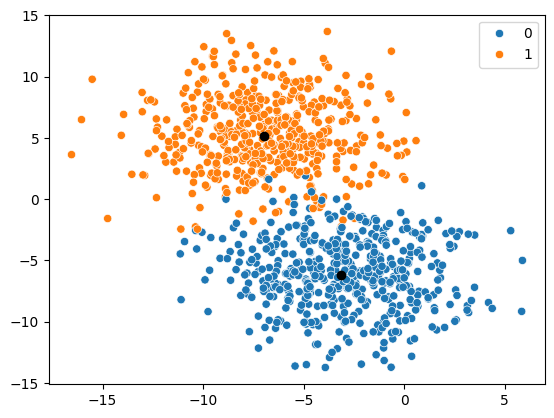

In [179]:
X, y, centers = make_blobs(centers=2, cluster_std=3, n_features=2, n_samples=1000, return_centers=True)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.scatter(x=centers[0][0], y=centers[0][1],color="black")
plt.scatter(x=centers[1][0], y=centers[1][1],color="black")

In [180]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,label
0,-0.403745,-3.438817,0.0
1,-7.510164,-1.791158,1.0
2,-7.150337,2.159013,1.0
3,-0.644848,-13.709724,0.0
4,-6.574515,5.724258,1.0
...,...,...,...
995,-8.229015,8.679238,1.0
996,-5.187812,2.221638,1.0
997,-4.977520,-10.049846,0.0
998,-4.608476,0.601282,0.0


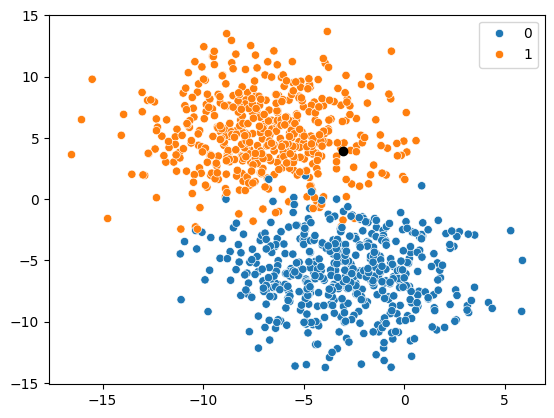

In [181]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred)
plt.scatter(x=df.values[5][0],y=df.values[5][1],color='black')

In [182]:
x,cf,h = Simple_CF_Descent(df,model, target=1.0, centers=centers)

Amount of changes:  71


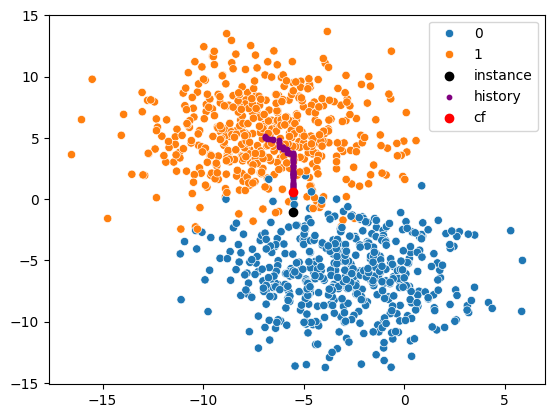

In [183]:
hx = list(zip(*h))[0]
hy = list(zip(*h))[1]
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred)
plt.scatter(x=x[0],y=x[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf[0],y=cf[1],color='red', label='cf')
plt.legend()

## PCA attempt

<Axes: >

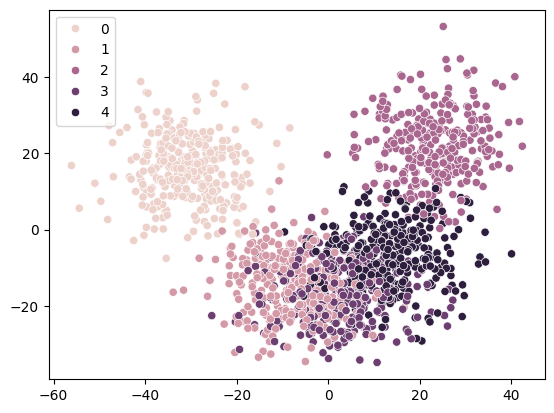

In [184]:
X, y, centers = make_blobs(centers=5, cluster_std=8, n_features=30, n_samples=1500, return_centers=True)

pca = PCA(n_components=2)
embed_X = pca.fit_transform(X)
sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y)

In [185]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,label
0,-6.400789,-2.347875,1.220904,4.146516,0.221507,11.737013,-5.519186,0.266406,2.700796,3.826414,...,18.682883,-0.020204,-11.880983,-12.728488,16.574246,3.307485,9.369180,3.504102,11.194231,2.0
1,-13.382573,-1.180155,11.584958,-8.619837,0.974365,-9.228061,19.488660,-8.226373,12.907835,6.867973,...,4.885767,5.843707,19.769464,-10.719311,-14.082134,10.814369,16.180244,-8.013796,-15.395300,1.0
2,-5.460105,1.959389,-0.857981,13.310825,19.903250,-3.537393,5.143230,5.554739,14.774876,8.348257,...,10.271489,-1.853513,0.926339,-1.198568,-3.578325,-6.005576,15.047607,-3.858498,-11.315329,4.0
3,5.509745,2.798895,-6.108199,2.452419,3.732383,-3.653086,4.839621,3.914271,5.120961,13.377214,...,10.870508,12.704144,4.816375,-21.138871,-10.404789,4.053719,6.223220,-5.041641,-13.324576,1.0
4,2.345173,-18.242900,-3.973951,4.514211,10.094751,19.625460,5.809432,-7.166916,15.747179,1.082449,...,18.974515,11.586675,-5.812600,15.519550,34.532889,-0.521074,9.381026,1.066517,5.235376,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,8.778163,-9.539071,-6.486617,3.277087,10.444848,1.737269,2.700760,-13.713680,-0.734378,-2.076054,...,12.601848,-12.494765,27.580331,8.265892,-2.655019,4.000323,-9.087668,-12.356650,-5.269376,0.0
1496,10.095761,9.815992,5.759461,11.116710,14.034897,1.933135,-0.914671,11.578426,8.493300,8.528651,...,-2.429788,10.040162,13.958753,0.321772,16.899865,3.161036,19.742205,5.051096,-13.023461,4.0
1497,-7.733321,-12.201473,6.005339,1.815108,7.052691,-15.172664,7.988255,-12.112816,-11.178057,2.262849,...,3.888902,-5.633424,-2.986520,3.714596,-4.734024,-1.685139,-6.814778,-3.203570,-11.730795,0.0
1498,-11.409595,1.190145,-4.015310,12.664023,-4.612655,5.848036,3.202545,2.327024,14.615983,10.929806,...,-1.824720,7.622165,-2.146469,-9.237727,8.813403,-7.135767,6.897701,12.116518,-9.732167,3.0


In [186]:
x,cf,h = Simple_CF_Descent(df,model, target=1.0, centers=centers)

Amount of changes:  433


In [187]:
cf_pca = pca.transform([cf])[0]

h_pca = pca.transform(h)

hx = list(zip(*h_pca))[0]
hy = list(zip(*h_pca))[1]

x_pca = pca.transform([x])[0]

Generating cf into class: 1
Predicted class for counterfactual is: 1


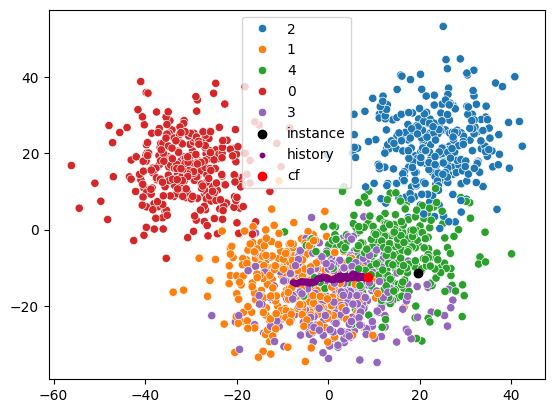

In [193]:

sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=pred)
plt.scatter(x=x_pca[0],y=x_pca[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf_pca[0],y=cf_pca[1],color='red', label='cf')
plt.legend()
print("Generating cf into class:", int(1.0))
print("Predicted class for counterfactual is:",model.predict([cf])[0])